## GRIP - The Sparks Foundation

## Data Science & Business Analytics

## Task 2 - Prediction using Unsupervised ML

## By - Venkata Lakshman M

In this task, from the given iris dataset, need to predict the optimum number of cluster and represent them visually.

## Import required libraries

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Import Data

In [200]:
df = pd.read_csv('Iris.csv')

In [201]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


## Eploring & Visualising the Data

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [203]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [204]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [205]:
df = df.drop('Id',axis=1)

In [206]:
df = df.drop('Species',axis=1)

In [207]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [208]:
fig = px.scatter(df, x="SepalLengthCm", y="SepalWidthCm", size='PetalLengthCm', hover_data=['PetalWidthCm'])
fig.show()

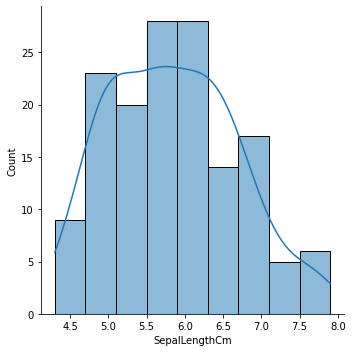

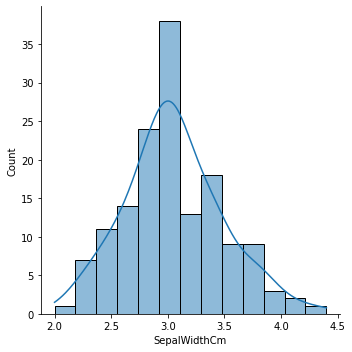

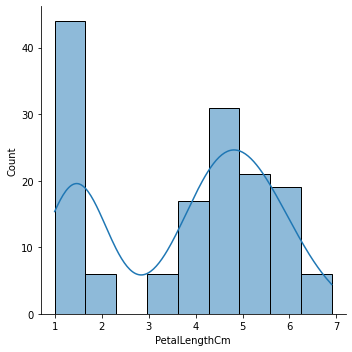

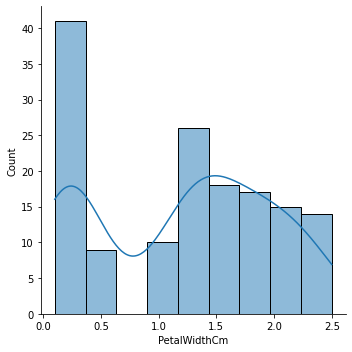

In [209]:
for column in df.columns:
    sns.displot(x=column,data=df,kde=True)

In [210]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


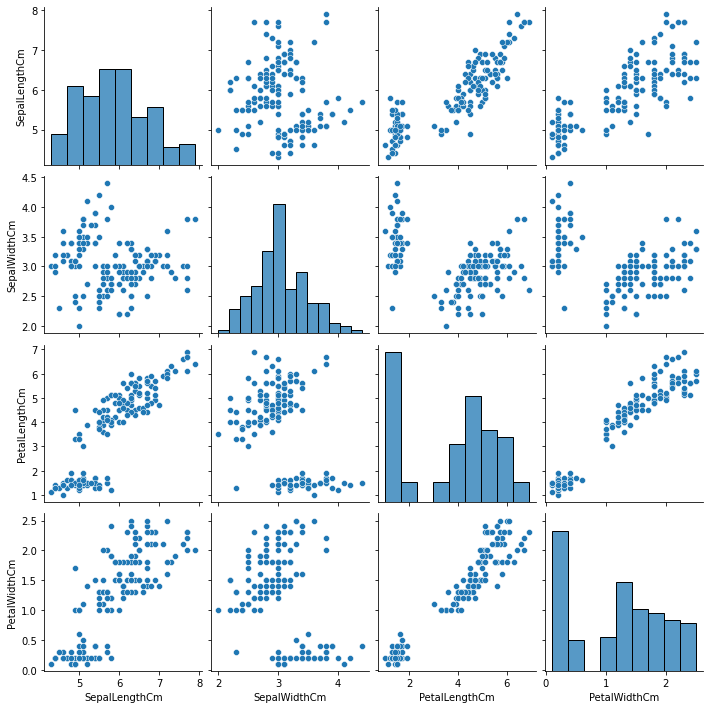

In [211]:
sns.pairplot(df)

## Training the Data

In [212]:
from sklearn.preprocessing import StandardScaler

In [213]:
scaler = StandardScaler()

In [214]:
scaled_data = scaler.fit_transform(df)

## KMeans Clustering

In [215]:
from sklearn.cluster import KMeans

In [216]:
model = KMeans(n_clusters=2)

In [217]:
model.fit(scaled_data)

KMeans(n_clusters=2)

In [218]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [219]:
df['cluster'] = model.labels_

<AxesSubplot:>

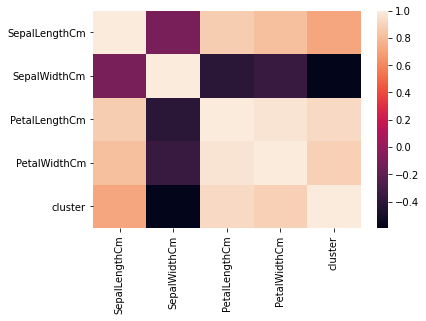

In [220]:
sns.heatmap(df.corr())

In [221]:
fig = px.scatter(df, x="SepalLengthCm", y="SepalWidthCm", color="cluster",
                 size='PetalLengthCm', hover_data=['PetalWidthCm'])
fig.show()

## Applying Elbow Method

In [222]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_data)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

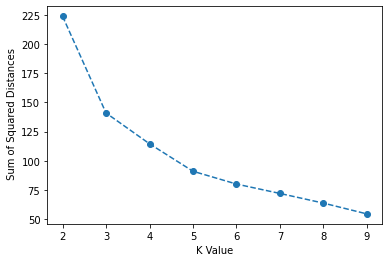

In [223]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

As a turn/bend formed at *K Value = 3*, from *elbow method*, we can say that Optimum number of clusters = 3

## Final Model

In [224]:
final_model = KMeans(n_clusters=3,max_iter=10000)

In [225]:
y_kmeans = final_model.fit_predict(scaled_data)

In [226]:
df['cluster'] = y_kmeans

## Visualisation
Visualizing for the optimum number of cluster 3

In [227]:
px.line(df)

In [228]:
# Plotting the centroids of the clusters
cl = scaler.inverse_transform(final_model.cluster_centers_)
cl = pd.DataFrame(cl)
cl.columns = df.columns[:4]
cl['cluster'] = 3
cl

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,6.780851,3.095745,5.510638,1.972340,3
1,5.006000,3.418000,1.464000,0.244000,3
2,5.801887,2.673585,4.369811,1.413208,3


In [229]:
for i in range(0,3):
    df.loc[150+i] =  cl.iloc[i]

In [230]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.100000,3.500000,1.400000,0.200000,1.0
1,4.900000,3.000000,1.400000,0.200000,1.0
2,4.700000,3.200000,1.300000,0.200000,1.0
3,4.600000,3.100000,1.500000,0.200000,1.0
4,5.000000,3.600000,1.400000,0.200000,1.0
...,...,...,...,...,...
148,6.200000,3.400000,5.400000,2.300000,0.0
149,5.900000,3.000000,5.100000,1.800000,2.0
150,6.780851,3.095745,5.510638,1.972340,3.0
151,5.006000,3.418000,1.464000,0.244000,3.0


In [231]:
fig = px.scatter(df, x="SepalLengthCm", y="SepalWidthCm", color="cluster",
                 size='PetalLengthCm', hover_data=['PetalWidthCm'])

fig.show()